# Caso de uso 3 - Aprendizaje no supervisado

### Introducción al caso de uso

El objetivo es segmentar a los clientes en grupos basados en sus patrones de compra y características demográficas, con el fin de identificar grupos con comportamientos similares para en un futuro extraer posibles targets de mercado.

#### Variable respuesta

No hay una variable respuesta. En lugar de predecir una variable, el objetivo es descubrir patrones o estructuras ocultas en los datos.

**El algoritmo KMeans, por ejemplo, agrupa los datos en grupos (clusters) basados únicamente en las características (variables independientes) sin una variable de destino conocida de antemano y es capaz de descubrir cuál es la mejor forma de agrupar las observaciones.**


#### Descripción del conjunto de datos

Los conjunto de datos se componen por:

* Datos numéricos (floats/enteros)
* Datos categóricos (object)

#### Problemas específicos de los datos

Los distintos conjuntos de datos tienen algunos problemas que hemos de tratar antes de aplicar cualquier modelo de ML. EN primer lugar, consideraremos:

* Modificaremos las variables categóricas que sean el **Precio** de todos los conjuntos de datos. Estas las convertiremos a numéricas y pasaremos de, p.ej: ($10) a 10 para indicar un coste de 10 dólares, pero sin el símbolo del dólar.
* Modificar varible de **Género**: Hombre será indicado por 0, Mujer por 1.
* Modificar varible de **Tipo**: Internal será indicado por 0, External por 1.
* Trataremos la fecha para coger su año, mes y dia
* Haremos otras modificaciones con las variables categóricas para convertir sus categorias en etiquetas numéricas

Más adelante convertiremos las variables categóricas a numéricas, esto lo hacemos para:

* **Compatibilidad con Modelos Estadísticos y de ML**: Muchos algoritmos de ML, como regresiones, árboles de decisión, entre otros, requieren que las variables sean numéricas. Estos modelos no pueden procesar directamente las variables categóricas porque operan matemáticamente con números.

* **Mejora en el Rendimiento del Modelo**: En algunos casos, la transformación de variables categóricas en numéricas puede mejorar la precisión y el rendimiento de los modelos. Por ejemplo, en la codificación one-hot, se crean variables binarias que indican la presencia o ausencia de cada categoría, lo que puede ayudar al modelo a capturar mejor las relaciones en los datos.

* **Facilitar el Análisis Estadístico**: En análisis estadístico, muchas pruebas y procedimientos requieren datos numéricos para calcular estadísticas como medias, varianzas, y otros. Convertir las variables categóricas a numéricas permite realizar estos análisis..

## Importación de paquetes

In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Librerías necesarias

In [2]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, silhouette_score
from matplotlib import rcParams

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.cluster import KMeans

from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="findfont: Generic family")

rcParams['font.family'] = 'DejaVu Sans'
rcParams['font.family'] = 'serif'


with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="The objective has been evaluated at this point before.")

In [3]:
!pwd

/home/marta/formacion-allianz


## Exploración previa de los datos

### Importación de los datos

El conjunto de datos con el que trabajaremos está en formato **Excel (.xslx)** y se compone por varias tablas definidas en distintas hojas del Excel. 

Importaremos los datos desde una hoja de Excel a un DataFrame de Pandas.

In [4]:
datosAllianz = pd.ExcelFile('datosVentasAllianz.xlsx')
datosAllianz.sheet_names #vemos las hojas que tiene

['Ventas',
 'Tiendas',
 'Productos',
 'Incidencias y promociones',
 'Clientes',
 'Ciudades']

In [5]:
dfUnificadoVentas = pd.read_excel(datosAllianz, 'Ventas')
dfUnificadoTiendas = pd.read_excel(datosAllianz, 'Tiendas')
dfUnificadoProductos = pd.read_excel(datosAllianz, 'Productos')
dfUnificadoIncidenciasPromos = pd.read_excel(datosAllianz, 'Incidencias y promociones')
dfUnificadoClientes = pd.read_excel(datosAllianz, 'Clientes')
dfUnificadoCiudades = pd.read_excel(datosAllianz, 'Ciudades')

### Anàlisis i exploración de los distintos conjuntos de datos con los que tratamos

In [6]:
dfUnificadoVentas.head()

,Venta ID,ProductoID,TiendaID,Status,Unidad,Precio,Cliente ID,Fecha
0,3.651007e+10,12.0,5.0,Sold,1.0,$40,2.300012e+14,2021-05-12
1,3.526179e+10,12.0,5.0,Sold,1.0,$40,2.300040e+14,2022-01-27
2,2.380638e+10,12.0,5.0,Sold,1.0,$40,2.300045e+14,2021-07-15
3,3.335946e+11,12.0,5.0,Sold,1.0,$40,2.300053e+14,2021-07-03
4,3.602100e+11,12.0,5.0,Sold,1.0,$40,2.300053e+14,2021-05-14


In [7]:
dfUnificadoVentas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044513 entries, 0 to 1044512
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Venta ID    29875 non-null    float64       
 1   ProductoID  29875 non-null    float64       
 2   TiendaID    29875 non-null    float64       
 3   Status      29875 non-null    object        
 4   Unidad      29875 non-null    float64       
 5   Precio      29875 non-null    object        
 6   Cliente ID  29875 non-null    float64       
 7   Fecha       1044513 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 63.8+ MB


## Agrupación de las características (features) de los distintos Datasets para poder formar el conjunto de datos que trataremos

#### Joins de las distintas tablas

In [8]:
dfUnificadoVentasTiendas = dfUnificadoVentas.merge(dfUnificadoTiendas, left_on='TiendaID', right_on='ID', suffixes=('', '_Tienda'))
dfUnificadoVentasTiendasProductos = dfUnificadoVentasTiendas.merge(dfUnificadoProductos, left_on='ProductoID', right_on='ID', suffixes=('', '_Producto'))
dfUnificadoVentasTiendasProductosClientes = dfUnificadoVentasTiendasProductos.merge(dfUnificadoClientes, left_on='Cliente ID', right_on='Cliente ID')
dfUnificado = dfUnificadoVentasTiendasProductosClientes.merge(dfUnificadoCiudades, left_on='ID Ciudad', right_on='ID Ciudad', suffixes=('', '_Ciudad'))

## Breve estadística descriptiva sobre el conjunto de datos

Como tratamos con un dataset que no tiene una extensión muy grande, podemos intentar ver la estadístca descriptiva de todas las variables así que podemos dar un primer vistazo a los datos.

In [9]:
dfUnificado.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Venta ID,29875.0,NaN,NaN,NaN,140107858454435.359375,1515142996.0,7467661604373.0,180583110815046.0,230562518076501.0,279993863829064.0,102762135697256.703125
ProductoID,29875.0,NaN,NaN,NaN,13.019883,1.0,8.0,14.0,19.0,24.0,6.497625
TiendaID,29875.0,NaN,NaN,NaN,7.205556,1.0,4.0,7.0,11.0,14.0,4.12491
Status,29875,2,Sold,21827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unidad,29875.0,NaN,NaN,NaN,1.161372,1.0,1.0,1.0,1.0,3.0,0.487269
Precio,29875,47,$40,4733,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cliente ID,29875.0,NaN,NaN,NaN,251173342358222.6875,230001248226788.0,237492802424251.0,249577857926098.0,263757366672700.5,279993863829064.0,14907805998397.3125
Fecha,29875,NaN,NaN,NaN,2022-01-29 19:52:06.185774080,2021-01-01 00:00:00,2021-07-19 00:00:00,2022-01-30 00:00:00,2022-08-13 12:00:00,2023-02-27 00:00:00,NaN
ID,29875.0,NaN,NaN,NaN,7.205556,1.0,4.0,7.0,11.0,14.0,4.12491
Nombre,29875,13,Contoso,3630,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dfUnificado['Precio'] = dfUnificado['Precio'].replace('[\$,]', '', regex=True).astype(float)
dfUnificado['Precio_Producto'] = dfUnificado['Precio_Producto'].replace('[\$,]', '', regex=True).astype(float)
dfUnificado['Genero'] = dfUnificado['Genero'].map({'Hombre': 0, 'Mujer': 1})
dfUnificado['Tipo'] = dfUnificado['Tipo'].map({'Internal': 0, 'External': 1})
dfUnificado['Status'] = dfUnificado['Status'].map({'Returned': 0, 'Sold': 1})

dfUnificado.head()

,Venta ID,ProductoID,TiendaID,Status,Unidad,Precio,Cliente ID,Fecha,ID,Nombre,...,Categoria,CategoriaID,Segmento,SegmentoID,Precio_Producto,Genero,Edad,Ciudad,C.A.,País
0,3.651007e+10,12.0,5.0,1,1.0,40.0,2.300012e+14,2021-05-12,5,Fama,...,XBOX,3,Green,4,40.0,0,33,Valencia,Comunidad Valenciana,España
1,3.526179e+10,12.0,5.0,1,1.0,40.0,2.300040e+14,2022-01-27,5,Fama,...,XBOX,3,Green,4,40.0,0,37,Valencia,Comunidad Valenciana,España
2,2.380638e+10,12.0,5.0,1,1.0,40.0,2.300045e+14,2021-07-15,5,Fama,...,XBOX,3,Green,4,40.0,1,24,Valencia,Comunidad Valenciana,España
3,3.335946e+11,12.0,5.0,1,1.0,40.0,2.300053e+14,2021-07-03,5,Fama,...,XBOX,3,Green,4,40.0,1,40,Valencia,Comunidad Valenciana,España
4,3.602100e+11,12.0,5.0,1,1.0,40.0,2.300053e+14,2021-05-14,5,Fama,...,XBOX,3,Green,4,40.0,0,34,Valencia,Comunidad Valenciana,España


In [11]:
columnas = list(dfUnificado.columns)
columnas.remove('Status')
columnas.insert(0, 'Status')
dfUnificado = dfUnificado.reindex(columns=columnas)

dfUnificado

,Status,Venta ID,ProductoID,TiendaID,Unidad,Precio,Cliente ID,Fecha,ID,Nombre,...,Categoria,CategoriaID,Segmento,SegmentoID,Precio_Producto,Genero,Edad,Ciudad,C.A.,País
0,1,3.651007e+10,12.0,5.0,1.0,40.0,2.300012e+14,2021-05-12,5,Fama,...,XBOX,3,Green,4,40.0,0,33,Valencia,Comunidad Valenciana,España
1,1,3.526179e+10,12.0,5.0,1.0,40.0,2.300040e+14,2022-01-27,5,Fama,...,XBOX,3,Green,4,40.0,0,37,Valencia,Comunidad Valenciana,España
2,1,2.380638e+10,12.0,5.0,1.0,40.0,2.300045e+14,2021-07-15,5,Fama,...,XBOX,3,Green,4,40.0,1,24,Valencia,Comunidad Valenciana,España
3,1,3.335946e+11,12.0,5.0,1.0,40.0,2.300053e+14,2021-07-03,5,Fama,...,XBOX,3,Green,4,40.0,1,40,Valencia,Comunidad Valenciana,España
4,1,3.602100e+11,12.0,5.0,1.0,40.0,2.300053e+14,2021-05-14,5,Fama,...,XBOX,3,Green,4,40.0,0,34,Valencia,Comunidad Valenciana,España
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29870,1,2.735679e+14,12.0,4.0,2.0,80.0,2.597147e+14,2022-12-09,4,Salvus,...,XBOX,3,Green,4,40.0,0,26,Barcelona,Cataluña,España
29871,1,2.732290e+14,12.0,13.0,2.0,80.0,2.597154e+14,2022-07-15,13,Contoso,...,XBOX,3,Green,4,40.0,1,39,Valencia,Comunidad Valenciana,España
29872,1,2.796445e+14,12.0,2.0,2.0,80.0,2.597207e+14,2022-07-01,2,Aliqui,...,XBOX,3,Green,4,40.0,1,23,Madrid,Madrid,España
29873,1,2.702894e+14,12.0,10.0,2.0,80.0,2.597253e+14,2021-12-28,10,Pirum,...,XBOX,3,Green,4,40.0,0,31,Valencia,Comunidad Valenciana,España


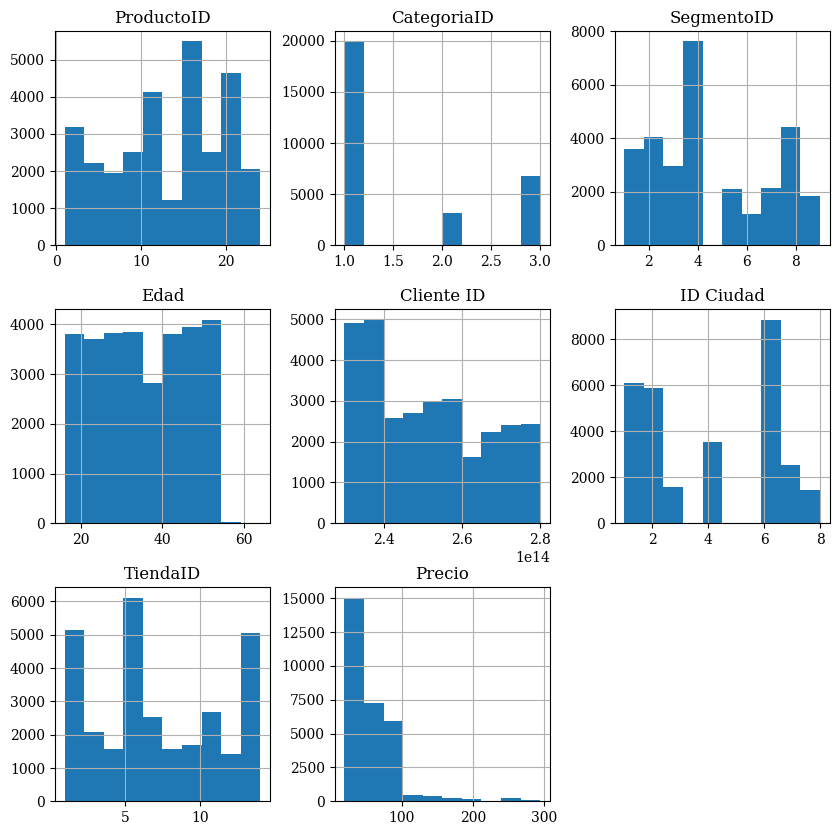

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
dfUnificado.loc[:,['ProductoID', 'CategoriaID', 'SegmentoID', 'Edad', 'Cliente ID', 'ID Ciudad', 'TiendaID', 'Precio']].hist(ax=ax);

In [13]:
columns_to_drop = ['Venta ID', 'País', 'ID', 'Segmento', 'Categoria', 'Producto', 'ID_Producto', 'Ciudad']
dfUnificado.drop(columns=columns_to_drop, inplace=True)

### Conversión variables categóricas en numéricas y preprocesamiento de la fecha

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dfUnificado['Año'] = dfUnificado['Fecha'].dt.year
dfUnificado['Mes'] = dfUnificado['Fecha'].dt.month
dfUnificado['Día'] = dfUnificado['Fecha'].dt.day
dfUnificado['DíaSemana'] = dfUnificado['Fecha'].dt.dayofweek

dfUnificado.drop(columns = 'Fecha', inplace=True)

categorical_columns = dfUnificado.select_dtypes(include=['object']).columns
for col in categorical_columns:
    dfUnificado[col] = label_encoder.fit_transform(dfUnificado[col])

In [15]:
dfUnificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29875 entries, 0 to 29874
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Status           29875 non-null  int64  
 1   ProductoID       29875 non-null  float64
 2   TiendaID         29875 non-null  float64
 3   Unidad           29875 non-null  float64
 4   Precio           29875 non-null  float64
 5   Cliente ID       29875 non-null  float64
 6   Nombre           29875 non-null  int64  
 7   Tipo             29875 non-null  int64  
 8   ID Ciudad        29875 non-null  int64  
 9   CategoriaID      29875 non-null  int64  
 10  SegmentoID       29875 non-null  int64  
 11  Precio_Producto  29875 non-null  float64
 12  Genero           29875 non-null  int64  
 13  Edad             29875 non-null  int64  
 14  C.A.             29875 non-null  int64  
 15  Año              29875 non-null  int32  
 16  Mes              29875 non-null  int32  
 17  Día         

## Análisis de Clustering utilizando KMeans

#### Selección de Características

En esta sección, seleccionamos las características que se utilizarán para realizar el clustering. Estas características son cruciales ya que definen cómo se agruparán los datos.

In [98]:
features = ['Edad', 'ProductoID']

#### Escalado de datos

**Antes de aplicar el algoritmo KMeans, es importante escalar los datos para que todas las características contribuyan equitativamente al modelo. En este caso, utilizamos MinMaxScaler para normalizar las características seleccionadas, lo que asegura que todas estén en el rango [0, 1].**

**El MinMaxScaler transforma los datos escalando cada característica a un rango especificado (por defecto [0, 1]). Esto es útil cuando las características tienen diferentes unidades o rangos y quieres que todas contribuyan de manera similar al clustering.**

In [99]:
scaler = MinMaxScaler()
dfUnificadoScaled = scaler.fit_transform(dfUnificado[features])

#### Determinación del Número Óptimo de Clusters - Método del Codo

En esta sección, utilizamos el Método del Codo para identificar el número óptimo de clusters (k). 
Este método ayuda a determinar en qué punto la inercia (dentro del cluster) deja de decrecer significativamente al aumentar k.

KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

<Figure size 800x400 with 0 Axes>

Text(0.5, 0, 'Número de clusters')

Text(0, 0.5, 'Inercia')

Text(0.5, 1.0, 'Método del Codo')

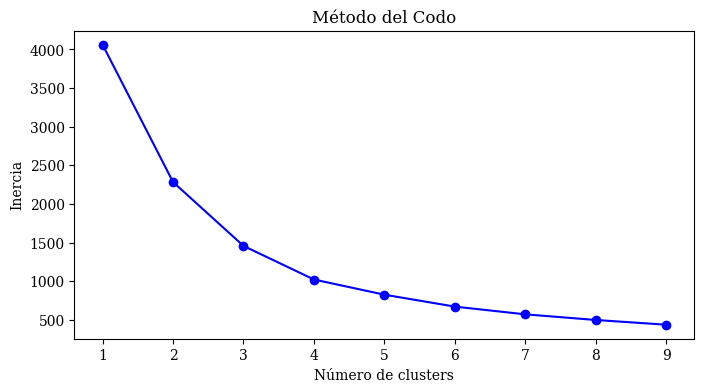

In [115]:
inercia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dfUnificadoScaled)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inercia, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

El gráfico del método del codo nos ayudará a identificar el punto en el que agregar más clusters no mejora significativamente la inercia, lo que indica un buen número de clusters para usar. En nuestro caso vemos que un buen número de clústers seria 4.

In [116]:
kmeans = KMeans(n_clusters=4, random_state=42)
dfUnificado['Cluster'] = kmeans.fit_predict(dfUnificadoScaled)

print(dfUnificado.groupby('Cluster').mean())

           Status  ProductoID  TiendaID    Unidad     Precio    Cliente ID  \
Cluster                                                                      
0        0.650126    5.777965  7.214634  1.161648  75.257023  2.551547e+14   
1        0.784816   17.356307  7.174817  1.163768  46.722459  2.488349e+14   
2        0.720879    7.256557  7.180366  1.152967  69.223150  2.515573e+14   
3        0.736816   18.387619  7.255650  1.165620  45.841160  2.505563e+14   

           Nombre      Tipo  ID Ciudad  CategoriaID  SegmentoID  \
Cluster                                                           
0        5.407906  0.715559   3.941800     1.000000    3.896047   
1        5.426977  0.714254   4.033038     1.917843    4.949677   
2        5.356044  0.705788   3.958681     1.375971    3.773480   
3        5.437092  0.713712   3.962205     1.725892    5.168383   

         Precio_Producto    Genero       Edad      C.A.          Año  \
Cluster                                                 

#### Visualización de clústers usando PCA 2D

Para interpretar los resultados del clustering, utilizamos PCA (Análisis de Componentes Principales) para reducir la dimensionalidad y visualizar los clusters en 2D. Esto nos permite ver cómo se agrupan las observaciones según las dos primeras componentes principales.

La visualización en 2D utilizando PCA ayuda a interpretar cómo se han formado los clusters y cuán separados están en el espacio transformado. Esto es especialmente útil para validar visualmente la calidad del clustering.

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Componente Principal 1')

Text(0, 0.5, 'Componente Principal 2')

Text(0.5, 1.0, 'Visualización de Clusters en 2D usando PCA')

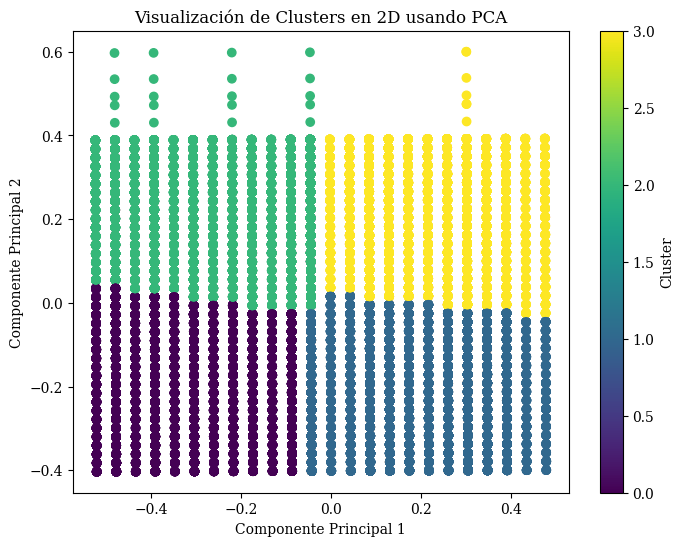

In [117]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principal_components = pca.fit_transform(dfUnificadoScaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = dfUnificado['Cluster']

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de Clusters en 2D usando PCA')
plt.colorbar(scatter, label='Cluster')
plt.show()

#### Visualización de clústers usando PCA 3D

La visualización en 3D utilizando PCA, al igual que en 2D, permite interpretar cómo se han formado los clusters y cuán separados están en el espacio transformado, pero con la ventaja adicional de poder captar más variabilidad en los datos al incluir una tercera componente principal. Esto puede ser especialmente útil en escenarios donde la estructura de los clusters no es claramente discernible en 2D y puede requerir una dimensión adicional para ser completamente apreciada.

Beneficios de la Visualización en 3D:
- Captura más variabilidad: Al incluir una tercera componente principal, se captura más información sobre la variabilidad de los datos, lo que puede proporcionar una visión más completa de la estructura del clustering.

- Mejor separación de clusters: Algunos clusters que podrían parecer solapados en 2D podrían separarse claramente en un espacio tridimensional. Esto es particularmente útil si los datos tienen una estructura compleja que no es evidente en dos dimensiones.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Cluster', ylabel='Edad'>

Text(0.5, 1.0, 'Distribución de Edad por Cluster')

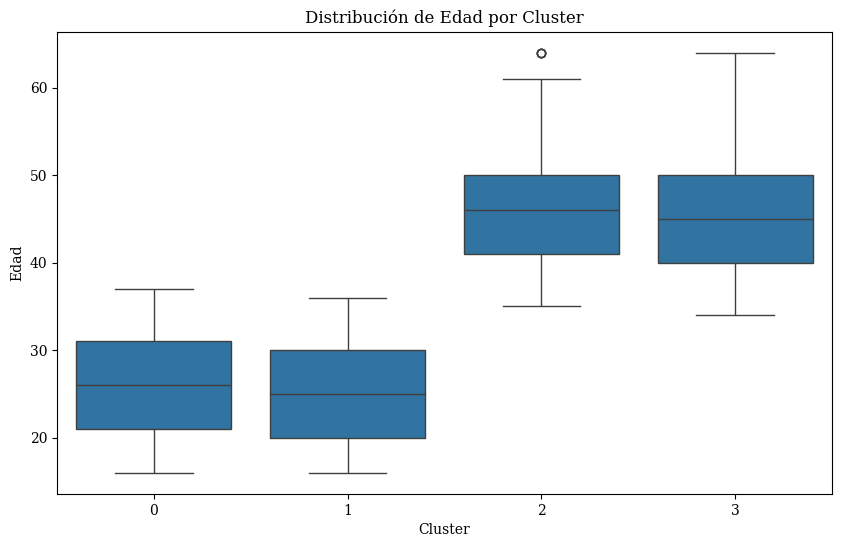

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Cluster', ylabel='Precio_Producto'>

Text(0.5, 1.0, 'Distribución de Precio_Producto por Cluster')

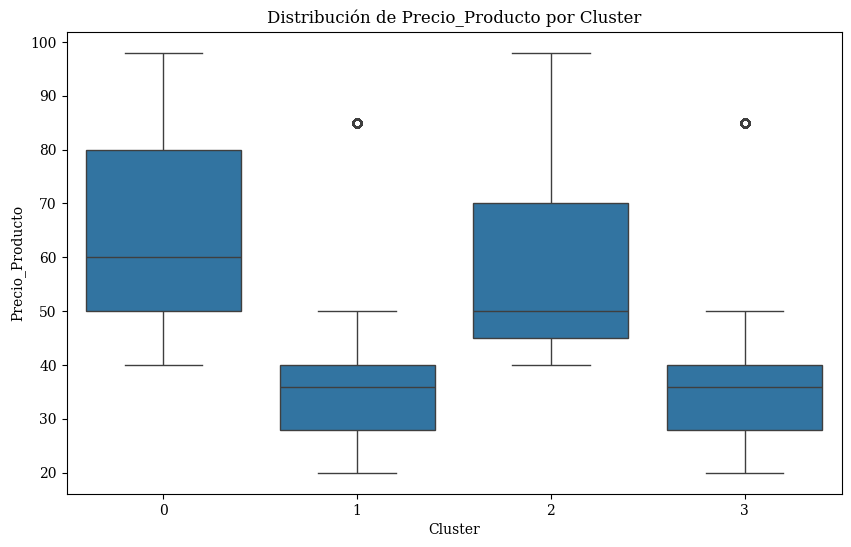

In [118]:
features = ['Edad', 'Precio_Producto'] 

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=dfUnificado)
    plt.title(f'Distribución de {feature} por Cluster')
    plt.show()

In [119]:
for cluster in dfUnificado['Cluster'].unique():
    print(f"\nCluster {cluster}")
    cluster_data = dfUnificado[dfUnificado['Cluster'] == cluster]
    print(cluster_data.describe())



Cluster 1
            Status   ProductoID     TiendaID       Unidad       Precio  \
count  9141.000000  9141.000000  9141.000000  9141.000000  9141.000000   
mean      0.784816    17.356307     7.174817     1.163768    46.722459   
std       0.410973     3.320194     4.108041     0.489478    30.802847   
min       0.000000    12.000000     1.000000     1.000000    20.000000   
25%       1.000000    15.000000     4.000000     1.000000    28.000000   
50%       1.000000    17.000000     7.000000     1.000000    40.000000   
75%       1.000000    20.000000    11.000000     1.000000    50.000000   
max       1.000000    24.000000    14.000000     3.000000   255.000000   

         Cliente ID       Nombre         Tipo    ID Ciudad  CategoriaID  \
count  9.141000e+03  9141.000000  9141.000000  9141.000000  9141.000000   
mean   2.488349e+14     5.426977     0.714254     4.033038     1.917843   
std    1.388916e+13     3.624203     0.451793     2.313551     0.911229   
min    2.300012e+14   

In [120]:
silhouette_avg = silhouette_score(dfUnificadoScaled, kmeans.labels_)
print(f"Coeficiente de Silhouette: {silhouette_avg}")

Coeficiente de Silhouette: 0.4027582438560865


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Cluster', ylabel='Edad'>

Text(0.5, 1.0, 'Distribución de Edad por Cluster')

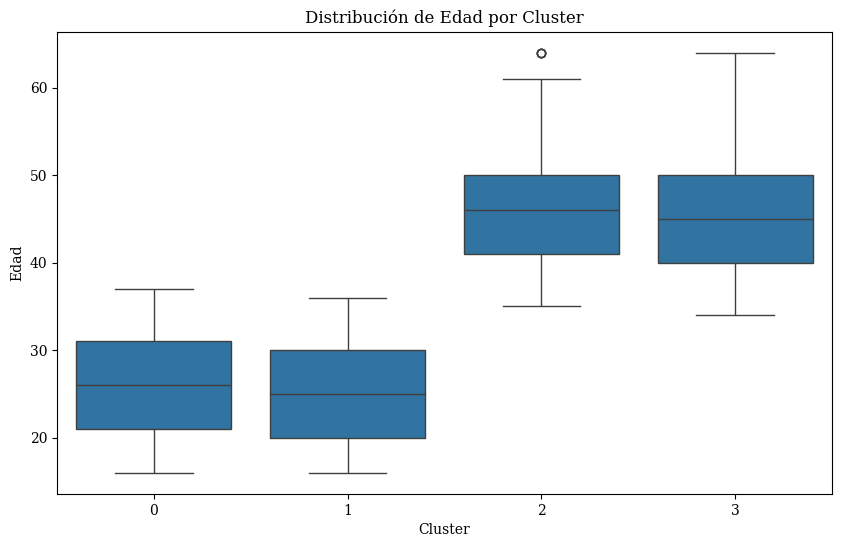

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Cluster', ylabel='ProductoID'>

Text(0.5, 1.0, 'Distribución de ProductoID por Cluster')

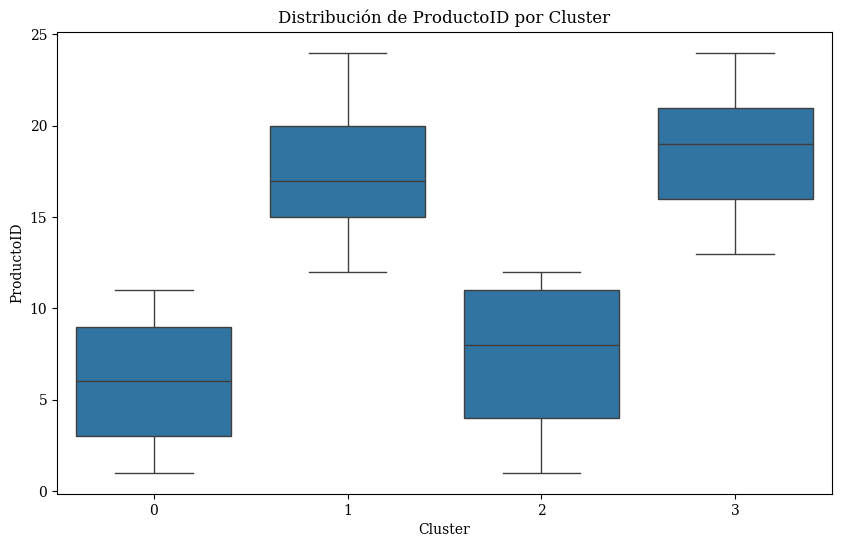

In [121]:
features = ['Edad', 'ProductoID'] 

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=dfUnificado)
    plt.title(f'Distribución de {feature} por Cluster')
    plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Edad', ylabel='Count'>

Text(0.5, 1.0, 'Distribución de Edad por Cluster')

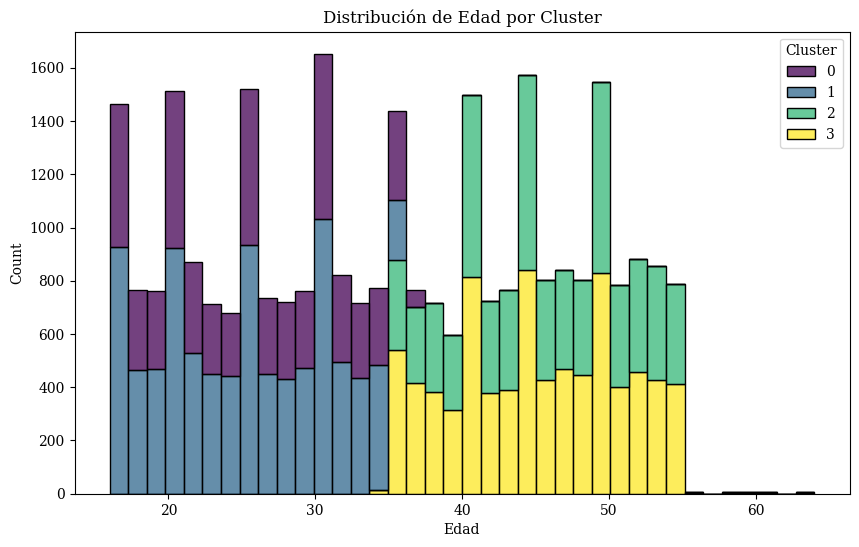

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='ProductoID', ylabel='Count'>

Text(0.5, 1.0, 'Distribución de ProductoID por Cluster')

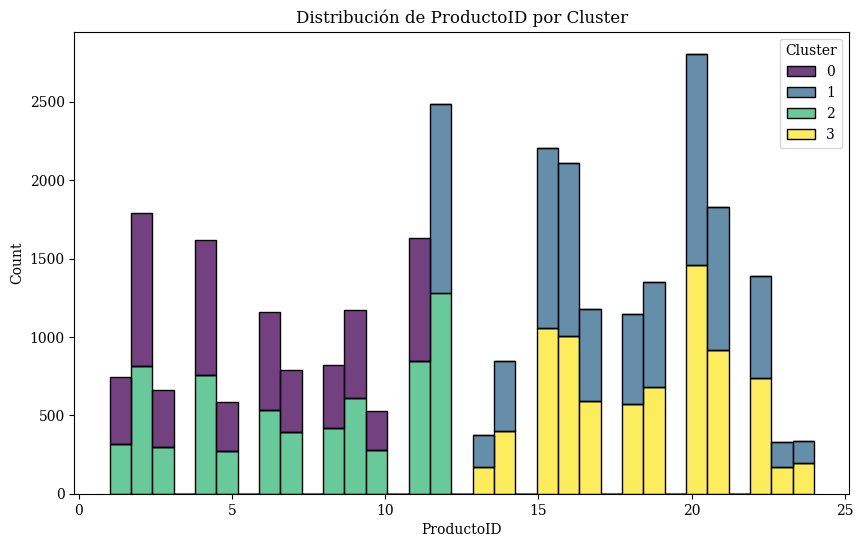

In [122]:
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=dfUnificado, x=feature, hue='Cluster', multiple='stack', palette='viridis')
    plt.title(f'Distribución de {feature} por Cluster')
    plt.show()
